In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline


In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_FIGURES'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [10]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [157]:
sessions = 'expo', 'pre', 'post'

for reference:

delta_t0 = 1

t_start0 = -5  # sec

t_stop0 = 9  # sec

In [97]:
comparisons = ['CSPvsCSM','CS1vsCS2','CS3vsCS4','CS1vsCS3','CS1vsCS4','CS2vsCS3','CS2vsCS4']
#relabels = [{1:0,2:0,3:1,4:1},{1:0,2:1,3:-1,4:-1},{1:-1,2:-1,3:0,4:1},{1:0,2:-1,3:1,4:-1},{1:0,2:-1,3:-1,4:1},{1:-1,2:0,3:1,4:-1},{1:-1,2:0,3:-1,4:1}]
comp_labels = ['CS+ vs CS-','CS+ vs CS+','CS-  vs CS-','CS1+ vs CS3-','CS1+ vs CS4-','CS2+ vs CS3-','CS2+ vs CS4-']
comp_colors = ['dimgray','m','c', '#7201a8', '#bd3786', '#ed7953', '#fdca26']
tt_colors = ['#7201a8', '#bd3786', '#ed7953', '#fdca26','dodgerblue']
tt_colors_k = ['#7201a8', '#bd3786', '#ed7953', '#fdca26','k']
alt_comparisons = ['CSPvsCSM_averaged','CS1vsCS2','CS3vsCS4','CS1vsCS3','CS1vsCS4','CS2vsCS3','CS2vsCS4']
reg_colors=['grey','mediumorchid','darkturquoise']
alt_colors=['#003f5c','#bc5090','#ffa600']
alt2_colors=['#15345c','#90488b','#ff6072']
dark_co = ('forestgreen','darkcyan','firebrick')
tt_pairs = ['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13']

In [ ]:
for tba in (range(14)):
    for tbb in (range(5)):
        eval("blah_blah_%s_%s = 17"%(tba, tbb))

In [8]:
v_name=[]
for t in range(14):
    for comp in comparisons:
        for r in 'dhpc','vhpc':
            exec("scores_tb_%s_%s_%s = {}"%(t,comp,r))
            for sess in sessions:
                exec("v_name = 'scores_tb_%s_%s'"%(t,comp))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_2wayOnly/'"%(r))
                if r == 'vhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_tb_%s_%s_%s_t = ut.load_variable(v_name,path)"%(t,comp,r))
                exec("scores_tb_%s_%s_%s_t = scores_tb_%s_%s_%s_t['%s']"%(t,comp,r,t,comp,r,sess))
                exec("scores_tb_%s_%s_%s['%s'] = scores_tb_%s_%s_%s_t"%(t,comp,r,sess,t,comp,r))

In [61]:
scores_tb_0_CS1vsCS2_dhpc

{'expo': array([ 0.41 ,  0.545,  0.605,  0.525,  0.485,  0.425,  0.56 ,  0.4  ,
         0.385,  0.33 ,  0.45 ,  0.615,  0.43 ,  0.325,  0.485]),
 'post': array([ 0.375,  0.465,  0.38 ,  0.6  ,  0.41 ,  0.475,  0.4  ,  0.655,
         0.42 ,  0.44 ,  0.57 ,  0.465,  0.385,  0.43 ,  0.515]),
 'pre': array([ 0.475,  0.38 ,  0.445,  0.415,  0.525,  0.45 ,  0.445,  0.415,
         0.45 ,  0.49 ,  0.5  ,  0.47 ,  0.405,  0.47 ,  0.375])}

In [9]:
#for an alternative take on CS+ vs CS-, average each idividual comparison
for reg in 'dhpc','vhpc':
    for t in range(14):
        exec("scores_tb_%s_CSPvsCSM_averaged_%s = {}"%(t,reg))
        for sess in sessions:
            exec("scores_tb_%s_CSPvsCSM_averaged_%s[sess] = np.mean((scores_tb_%s_CS1vsCS3_%s[sess],scores_tb_%s_CS1vsCS4_%s[sess],\
                  scores_tb_%s_CS2vsCS3_%s[sess],scores_tb_%s_CS2vsCS4_%s[sess]),axis=0)"%(t,reg,t,reg,t,reg,t,reg,t,reg))

In [51]:
#get mean of each array  #hold on...is this even necessary? Already have the mean
for t in range(14):
    for comp in comparisons:
        for r in 'dhpc','vhpc':
            exec("mean_scores_tb_%s_%s_%s={}"%(t,comp,r))
            for sess in sessions:
                exec("mean_scores_tb_%s_%s_%s[sess]=[]"%(t,comp,r))
                for i in eval("scores_tb_%s_%s_%s[sess]"%(t,comp,r)):
                    exec("mean_scores_tb_%s_%s_%s[sess].append(i.mean())"%(t,comp,r))

In [52]:
scores_tb_0_CS1vsCS3_dhpc

{'expo': array([ 0.425,  0.705,  0.535,  0.435,  0.565,  0.455,  0.375,  0.405,
         0.505,  0.405,  0.41 ,  0.51 ,  0.5  ,  0.375,  0.405]),
 'post': array([ 0.475,  0.58 ,  0.505,  0.555,  0.395,  0.505,  0.455,  0.435,
         0.39 ,  0.425,  0.53 ,  0.44 ,  0.545,  0.385,  0.365]),
 'pre': array([ 0.37 ,  0.37 ,  0.53 ,  0.455,  0.385,  0.43 ,  0.445,  0.515,
         0.535,  0.35 ,  0.41 ,  0.41 ,  0.53 ,  0.52 ,  0.38 ])}

In [11]:
loops=10
for t in range (14):
    for comp in comparisons:
        exec("ttest_tb_%s_%s = {}"%(t,comp))
        exec("mannwhitU_tb_%s_%s = {}"%(t,comp))
        for sess in sessions:
            exec("ttest_tb_%s_%s[sess] = sstats.ttest_ind(mean_scores_tb_%s_%s_dhpc[sess][:loops],mean_scores_tb_%s_%s_vhpc[sess][:loops])"%(t,comp,t,comp,t,comp))
            exec("mannwhitU_tb_%s_%s[sess] = sstats.mannwhitneyu(mean_scores_tb_%s_%s_dhpc[sess][:loops],mean_scores_tb_%s_%s_vhpc[sess][:loops])"%(t,comp,t,comp,t,comp))

In [6]:
v_name=[]
for t in range(14):
    for pairs in ['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13','averaged',
                 'tr13_ts14','tr14_ts13','tr23_ts24','tr24_ts23','tr13_ts23','tr14_ts24','tr23_ts13','tr24_ts14','pos_cont_averaged']:
        for r in 'dhpc','vhpc':
            exec("scores_tb_%s_outcome_%s_%s = {}"%(t,pairs,r))
            for sess in sessions:
                exec("v_name = 'scores_tb_%s_outcome_%s'"%(t,pairs))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_2wayOnly/'"%(r))
                if r == 'vhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_tb_%s_outcome_%s_%s_t = ut.load_variable(v_name,path)"%(t,pairs,r))
                exec("scores_tb_%s_outcome_%s_%s_t = scores_tb_%s_outcome_%s_%s_t['%s']"%(t,pairs,r,t,pairs,r,sess))
                exec("scores_tb_%s_outcome_%s_%s['%s'] = scores_tb_%s_outcome_%s_%s_t"%(t,pairs,r,sess,t,pairs,r))

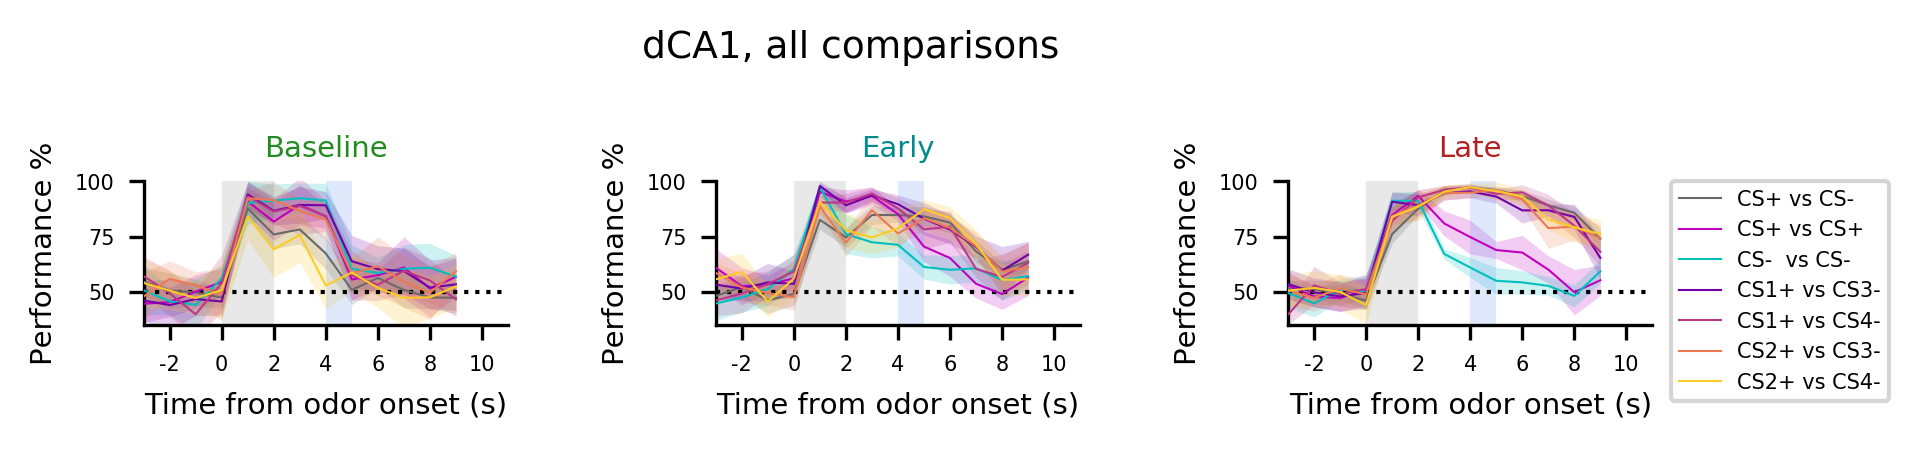

In [98]:
fig, ax = pl.subplots(1,3, figsize=(6, 1.5))

for comp,c,la in zip(comparisons,comp_colors,comp_labels):
    for r,sess in zip(range(3),sessions):
        ax[r].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_%s_dhpc[sess]"%(t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_%s_dhpc[sess]"%(t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_%s_dhpc[sess]"%(t,comp)))*100 for t in range(14)])
        ax[r].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for x in range (3):
    ax[x].set_ylim(35, 100)
    ax[x].set_xlim(-3, 11)
    ax[x].set_xticks(np.arange(-2,11, 2))
    ax[x].set_xticklabels(np.arange(-2,11, 2))
    ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Baseline', color=dark_co[0])
ax[1].set_title('Early', color = dark_co[1])
ax[2].set_title('Late', color = dark_co[2])
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("dCA1, all comparisons", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

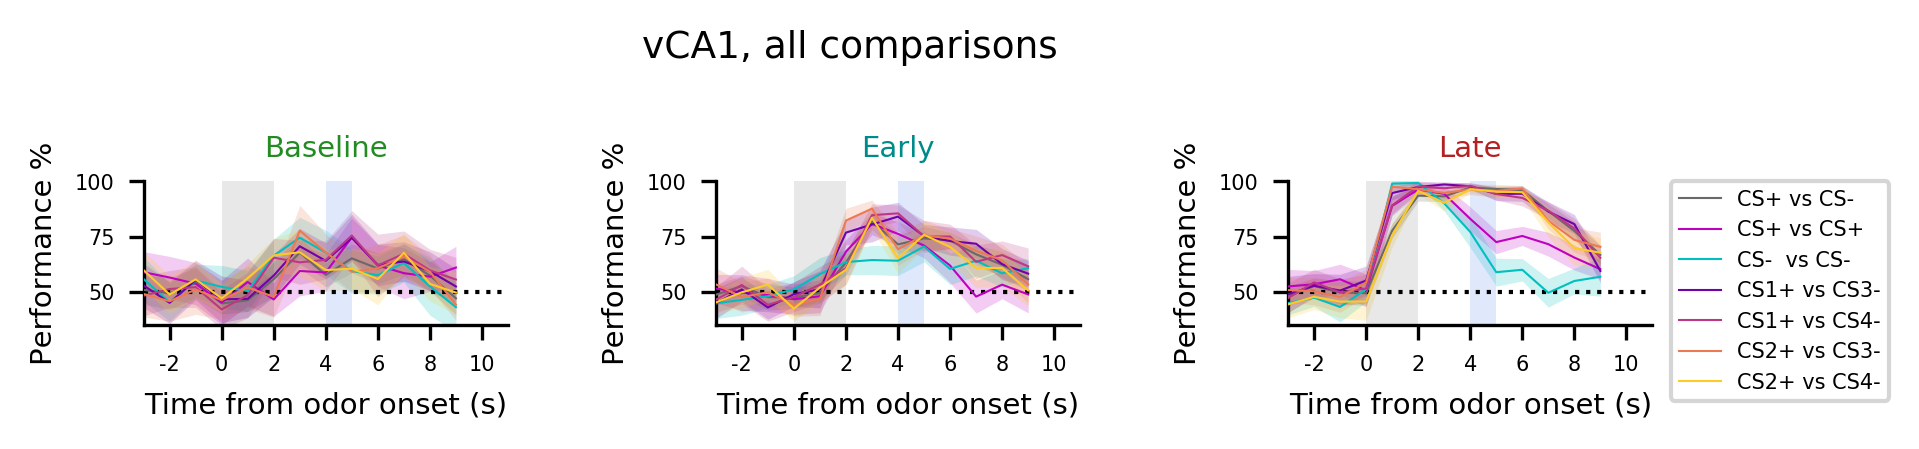

In [99]:
fig, ax = pl.subplots(1,3, figsize=(6, 1.5))

for comp,c,la in zip(comparisons,comp_colors,comp_labels):
    for r,sess in zip(range(3),sessions):
        ax[r].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_%s_vhpc[sess]"%(t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_%s_vhpc[sess]"%(t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_%s_vhpc[sess]"%(t,comp)))*100 for t in range(14)])
        ax[r].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for x in range (3):
    ax[x].set_ylim(35, 100)
    ax[x].set_xlim(-3, 11)
    ax[x].set_xticks(np.arange(-2,11, 2))
    ax[x].set_xticklabels(np.arange(-2,11, 2))
    ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Baseline', color=dark_co[0])
ax[1].set_title('Early', color = dark_co[1])
ax[2].set_title('Late', color = dark_co[2])
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("vCA1, all comparisons", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

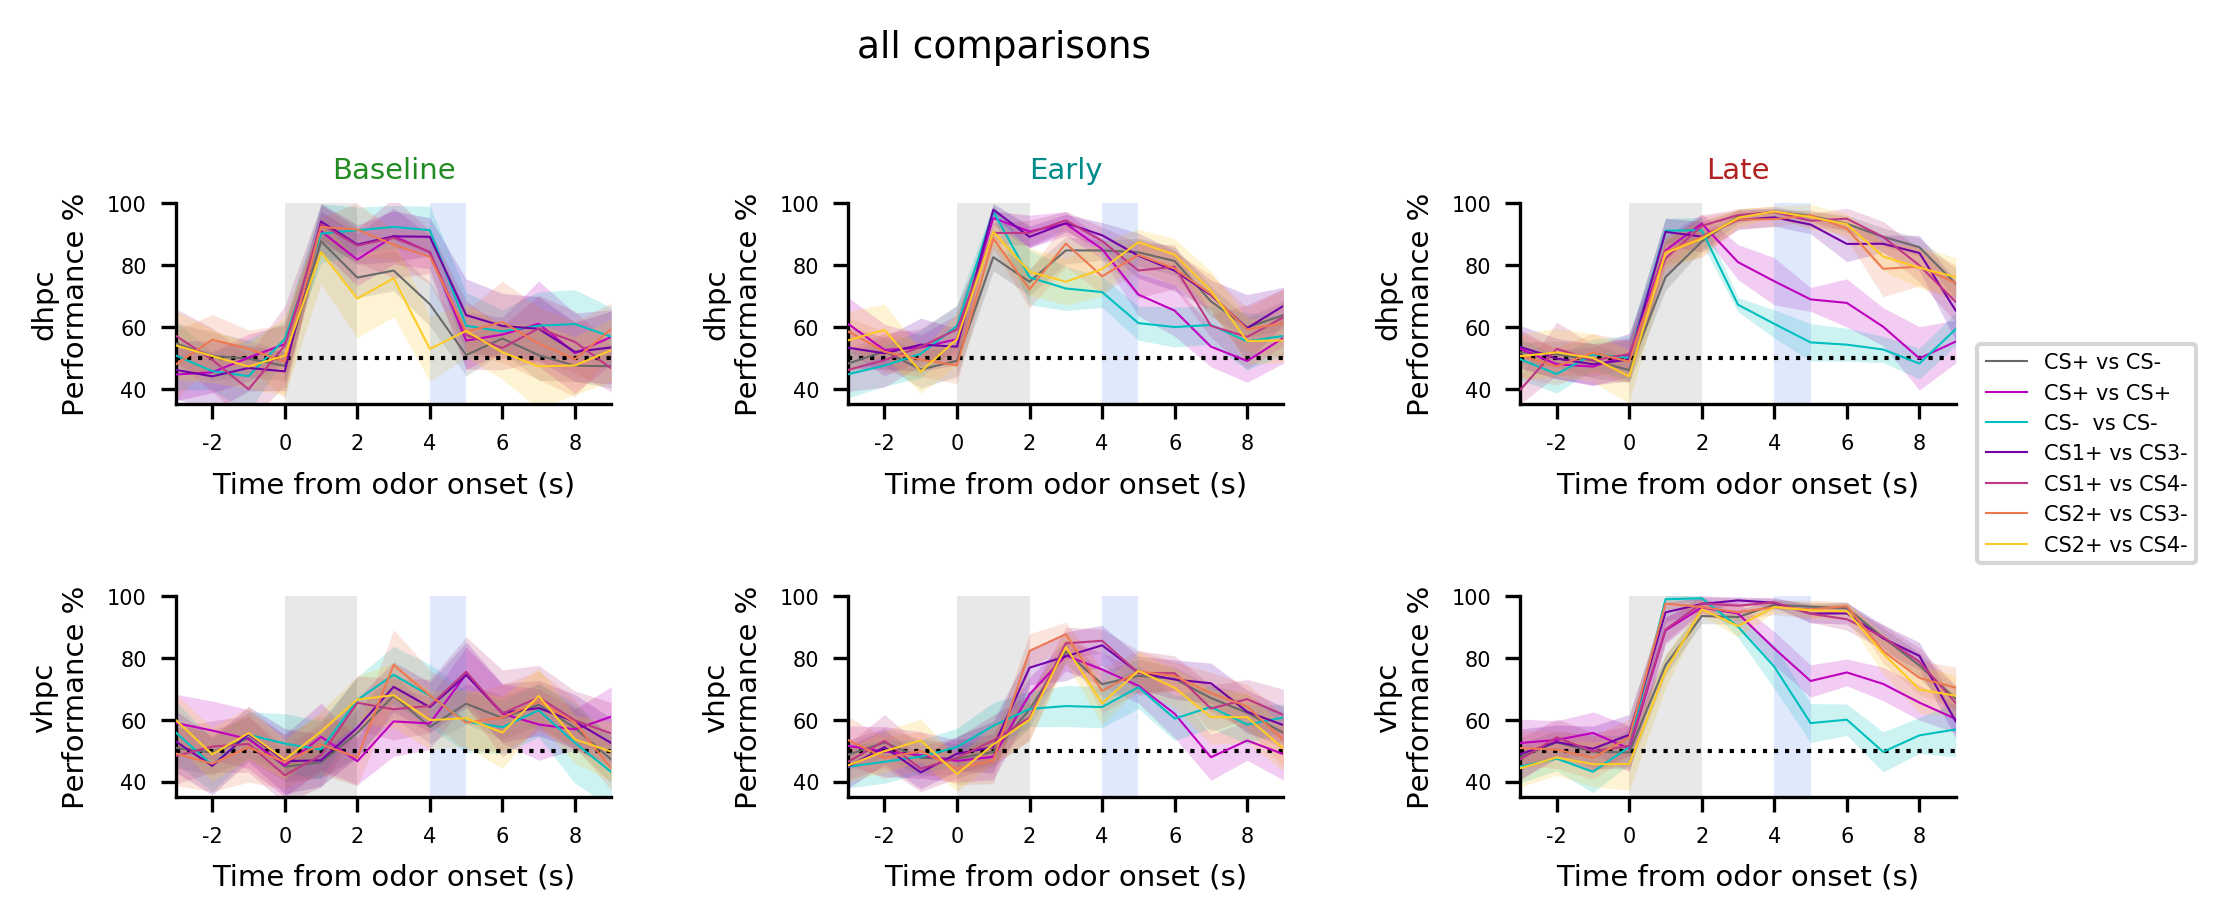

In [100]:
fig, ax = pl.subplots(2,3, figsize=(7, 3))

for comp,c,la in zip(comparisons,comp_colors,comp_labels):
    for y,sess in zip(range(3),sessions):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x][y].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100) for t in range(14)])
            s = np.array([np.std(eval("scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100 for t in range(14)])
            ax[x][y].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x][y].set_ylim(35, 100)
        ax[x][y].set_xlim(-3, 9)
        ax[x][y].set_xticks(np.arange(-2,9, 2))
        ax[x][y].set_xticklabels(np.arange(-2,9, 2))
        ax[x][y].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x][y].set_xlabel('Time from odor onset (s)')
        ax[x][y].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x][y], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x][y], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0][0].set_title('Baseline', color=dark_co[0])
ax[0][1].set_title('Early', color = dark_co[1])
ax[0][2].set_title('Late', color = dark_co[2])
ax[0][2].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("all comparisons", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_ALLcomp_ALLtbs_ALLsess_dv.pdf'%NOTEBOOK_NAME)

### plot dhpc and vhpc on same plot. CS, Tr and US plots

In [8]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [9]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=loops, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5, color=colors)
    return sig_value, p

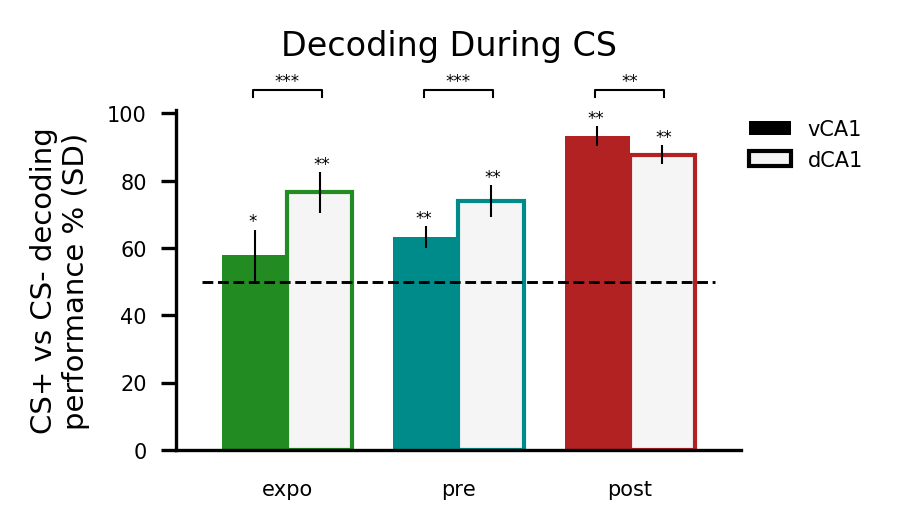

In [18]:
from matplotlib.patches import Patch
labels = sessions
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
comp = 'CSPvsCSM'
fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    v[sess] = np.array(np.std(eval("mean_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100)
    ax.bar(i - width/2, np.mean(eval("mean_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100, width, color=c,yerr=v[sess])
    d[sess] = np.array(np.std(eval("mean_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100)
    ax.bar(i + width/2,  np.mean(eval("mean_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CS+ vs CS- decoding\nperformance % (SD)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, eval("mean_scores_tb_6_%s_vhpc"%(comp))[sess][:loops], eval("mean_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],
        -.2+i,0.2+i,107))
    pvs.append(sig_vs_chance(ax,eval("mean_scores_tb_6_%s_vhpc"%(comp))[sess][:loops],.5,-.2+i,
               np.mean(eval("mean_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,eval("mean_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],.5, .2+i,
               np.mean(eval("mean_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

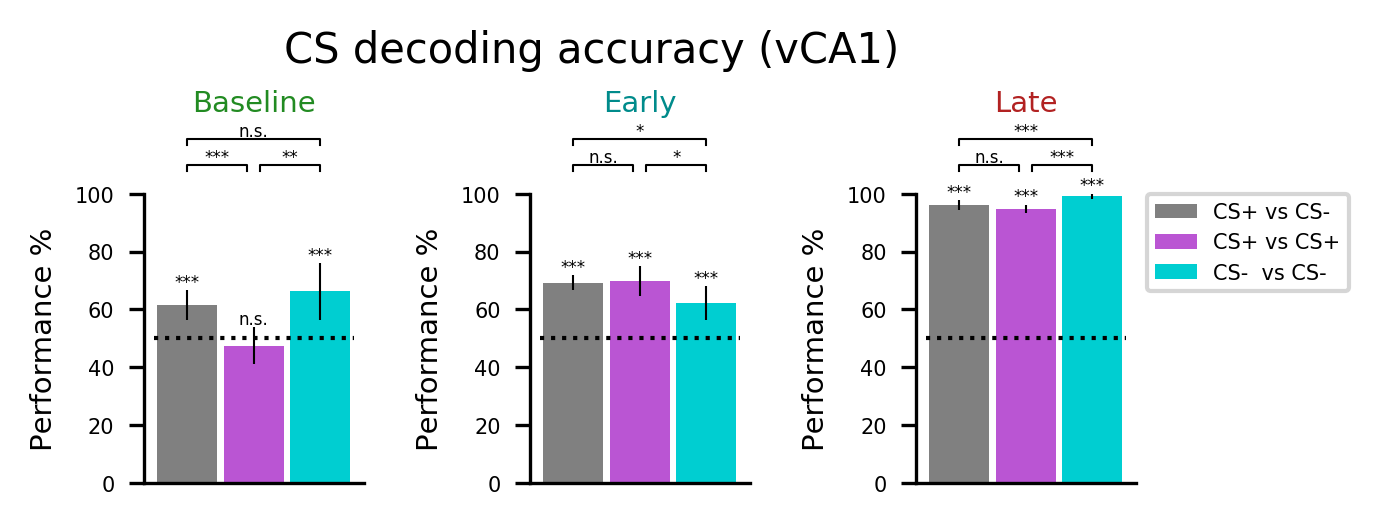

In [88]:
fig, ax = pl.subplots(1,3, figsize=(4, 1.7))
loops=10
reg='vhpc'
for comp,c,la,i in zip(alt_comparisons[:3],reg_colors,comp_labels[:3],range(len(comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        ax[r].bar(i,np.mean(eval("scores_tb_6_%s_%s[sess][:loops]"%(comp,reg)))*100,width=.9, color=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_6_%s_%s[sess][:loops])*100)"%(comp,sess,reg,comp,reg))
        ax[r].errorbar(i,np.mean(eval("scores_tb_6_%s_%s[sess][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
for x in range (3):
    ax[x].set_ylim(0, 100)
    #ax[x].set_xlim(-5, 9)
    ax[x].hlines(50, -0.5,2.5, color='k', lw=1, linestyles='dotted')
    #ax[x].set_xlabel('Comparison')
    ax[x].set_ylabel('Performance %')
    ax[x].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,sess in zip(range(3),sessions):
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],0,.9,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],1.1,2,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],0,2,119,mcc=2))
for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_6_%s_%s[sess]"%(comp,reg))[:15],.5,i,
               np.mean(eval("scores_tb_6_%s_%s[sess][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

ax[0].set_title('Baseline', color=dark_co[0], y=1.2)
ax[1].set_title('Early', color = dark_co[1], y=1.2)
ax[2].set_title('Late', color = dark_co[2], y=1.2)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("CS decoding accuracy (vCA1)", fontsize=10, y=1)

fig.tight_layout(pad=1)

fig.savefig('../figures/%s_3comp_bars_ALLsess_CS_v.pdf'%NOTEBOOK_NAME)

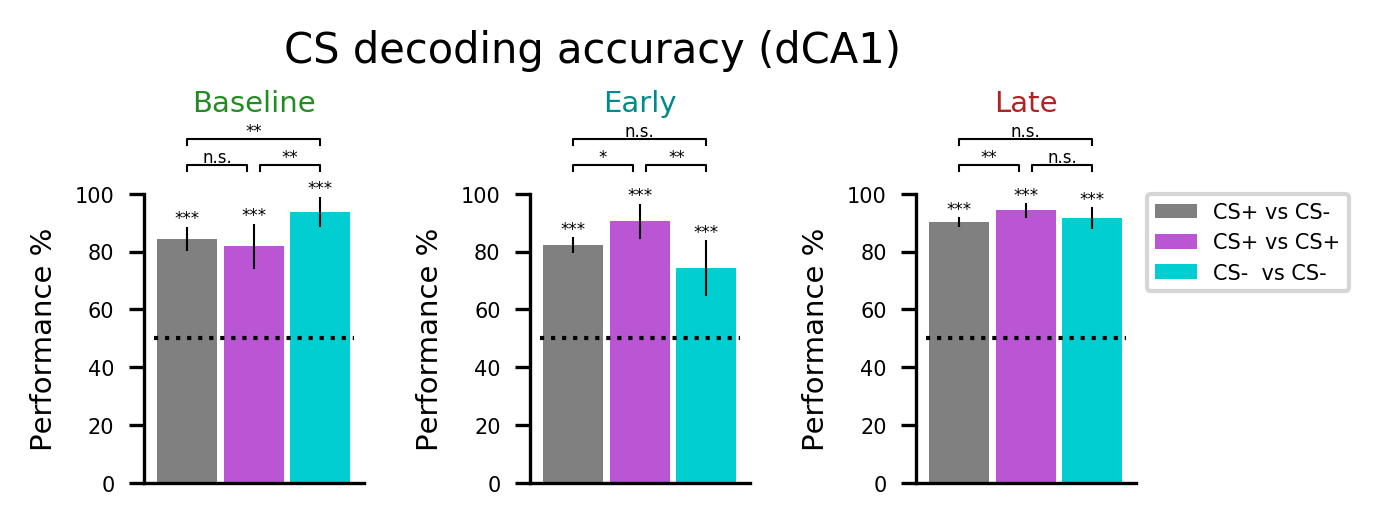

In [129]:
fig, ax = pl.subplots(1,3, figsize=(4, 1.7))
loops=10
reg='dhpc'
for comp,c,la,i in zip(alt_comparisons[:3],reg_colors[:3],comp_labels[:3],range(len(comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        ax[r].bar(i,np.mean(eval("scores_tb_6_%s_%s[sess][:loops]"%(comp,reg)))*100,width=.9, color=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_6_%s_%s[sess][:loops])*100)"%(comp,sess,reg,comp,reg))
        ax[r].errorbar(i,np.mean(eval("scores_tb_6_%s_%s[sess][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
for x in range (3):
    ax[x].set_ylim(0, 100)
    #ax[x].set_xlim(-5, 9)
    ax[x].hlines(50, -0.5,2.5, color='k', lw=1, linestyles='dotted')
    #ax[x].set_xlabel('Comparison')
    ax[x].set_ylabel('Performance %')
    ax[x].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,sess in zip(range(3),sessions):
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],0,.9,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],1.1,2,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_6_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],0,2,119,mcc=2))
for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_6_%s_%s[sess]"%(comp,reg))[:15],.5,i,
               np.mean(eval("scores_tb_6_%s_%s[sess][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

ax[0].set_title('Baseline', color=dark_co[0], y=1.2)
ax[1].set_title('Early', color = dark_co[1], y=1.2)
ax[2].set_title('Late', color = dark_co[2], y=1.2)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("CS decoding accuracy (dCA1)", fontsize=10, y=1)

fig.tight_layout(pad=1)


fig.savefig('../figures/%s_3comp_bars_ALLsess_CS_d.pdf'%NOTEBOOK_NAME)

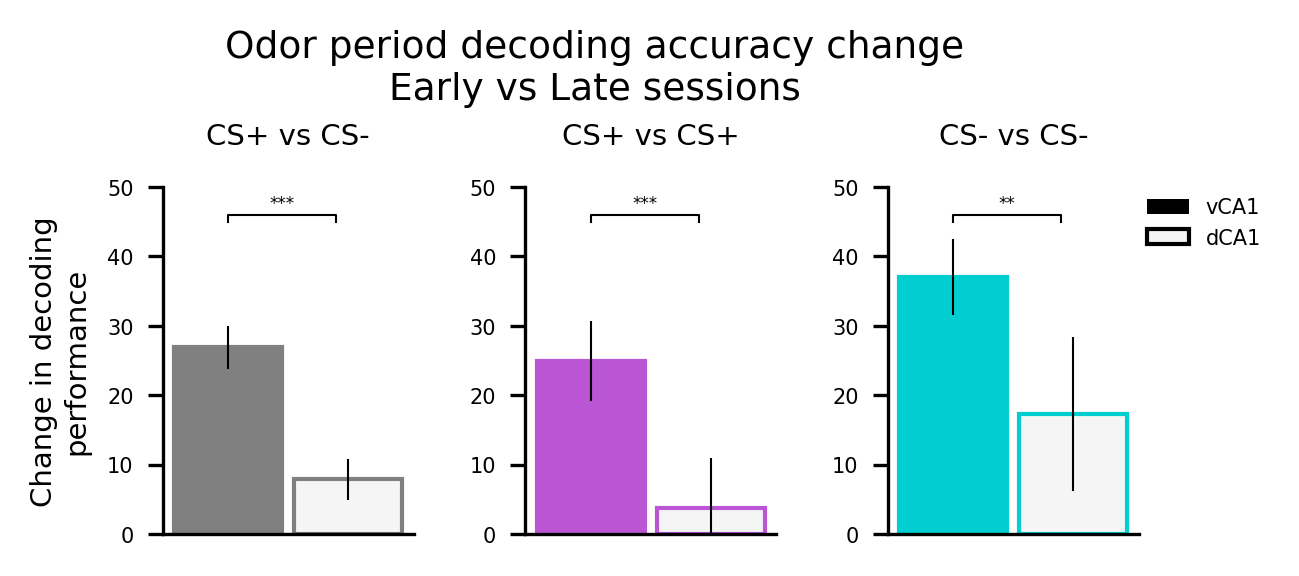

In [130]:
fig, ax = pl.subplots(1,3, figsize=(4, 1.7))
loops=10
for comp,c,la,r in zip(alt_comparisons[:3],reg_colors[:3],comp_labels[:3],range(len(comparisons[:3]))):
    for i,reg,cc in zip(range(2),['vhpc','dhpc'],[c,'whitesmoke']):
        ax[r].bar(i,np.mean(eval("scores_tb_6_%s_%s['post'][:loops]-scores_tb_6_%s_%s['pre'][:loops]"%(comp,reg,comp,reg)))*100,
                  width=.9, color=cc,edgecolor=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_6_%s_%s['post'][:loops]-scores_tb_6_%s_%s['pre'][:loops])*100)"%(comp,sess,reg,comp,reg,comp,reg))
        ax[r].errorbar(i,np.mean(eval("scores_tb_6_%s_%s['post'][:loops]-scores_tb_6_%s_%s['pre'][:loops]"%(comp,reg,comp,reg)))*100,
                       yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
for x in range (3):
    ax[x].set_ylim(0, 50)
    #ax[x].set_xlim(-5, 9)
    #ax[x].set_xlabel('Comparison')
    ax[0].set_ylabel('Change in decoding\nperformance')
    ax[x].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,comp in zip(range(3),alt_comparisons[:3]):
    pvs.append(add_significance(ax[r], eval("scores_tb_6_%s_dhpc['post'][:loops]-scores_tb_6_%s_dhpc['pre'][:loops]"%(comp,comp)),
                eval("scores_tb_6_%s_vhpc['post'][:loops]-scores_tb_6_%s_vhpc['pre'][:loops]"%(comp,comp)),0,.9,46,mcc=2))

ax[0].set_title('CS+ vs CS-', y=1.05)
ax[1].set_title('CS+ vs CS+', y=1.05)
ax[2].set_title('CS- vs CS-', y=1.05)
ax[2].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
pl.suptitle("Odor period decoding accuracy change\nEarly vs Late sessions", fontsize=9, y=1.1)

fig.tight_layout(pad=1)


fig.savefig('../figures/%s_odor_decoding_change_dv.pdf'%NOTEBOOK_NAME)

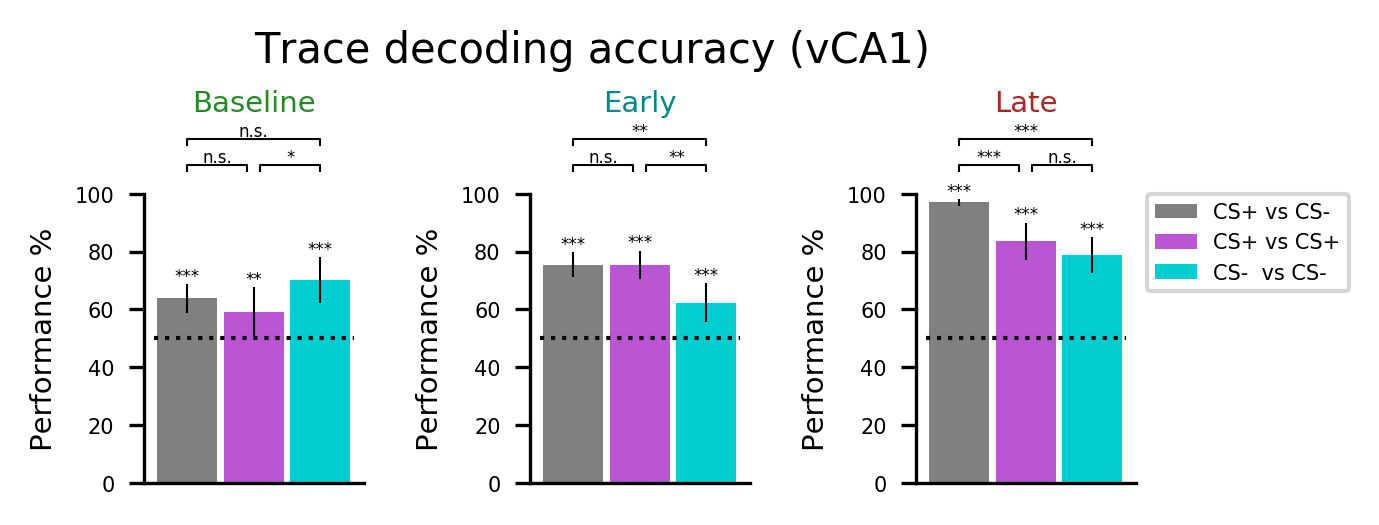

In [90]:
fig, ax = pl.subplots(1,3, figsize=(4, 1.7))
loops=10
reg='vhpc'
for comp,c,la,i in zip(alt_comparisons[:3],reg_colors[:3],comp_labels[:3],range(len(comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        ax[r].bar(i,np.mean(eval("scores_tb_8_%s_%s[sess][:loops]"%(comp,reg)))*100,width=.9, color=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_8_%s_%s[sess][:loops])*100)"%(comp,sess,reg,comp,reg))
        ax[r].errorbar(i,np.mean(eval("scores_tb_8_%s_%s[sess][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
for x in range (3):
    ax[x].set_ylim(0, 100)
    #ax[x].set_xlim(-5, 9)
    ax[x].hlines(50, -0.5,2.5, color='k', lw=1, linestyles='dotted')
    #ax[x].set_xlabel('Comparison')
    ax[x].set_ylabel('Performance %')
    ax[x].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,sess in zip(range(3),sessions):
    pvs.append(add_significance(ax[r], eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],0,.9,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],1.1,2,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],0,2,119,mcc=2))
for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_8_%s_%s[sess]"%(comp,reg))[:15],.5,i,
               np.mean(eval("scores_tb_8_%s_%s[sess][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

ax[0].set_title('Baseline', color=dark_co[0], y=1.2)
ax[1].set_title('Early', color = dark_co[1], y=1.2)
ax[2].set_title('Late', color = dark_co[2], y=1.2)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Trace decoding accuracy (vCA1)", fontsize=10, y=1)

fig.tight_layout(pad=1)

fig.savefig('../figures/%s_3comp_bars_ALLsess_tr_v.pdf'%NOTEBOOK_NAME)

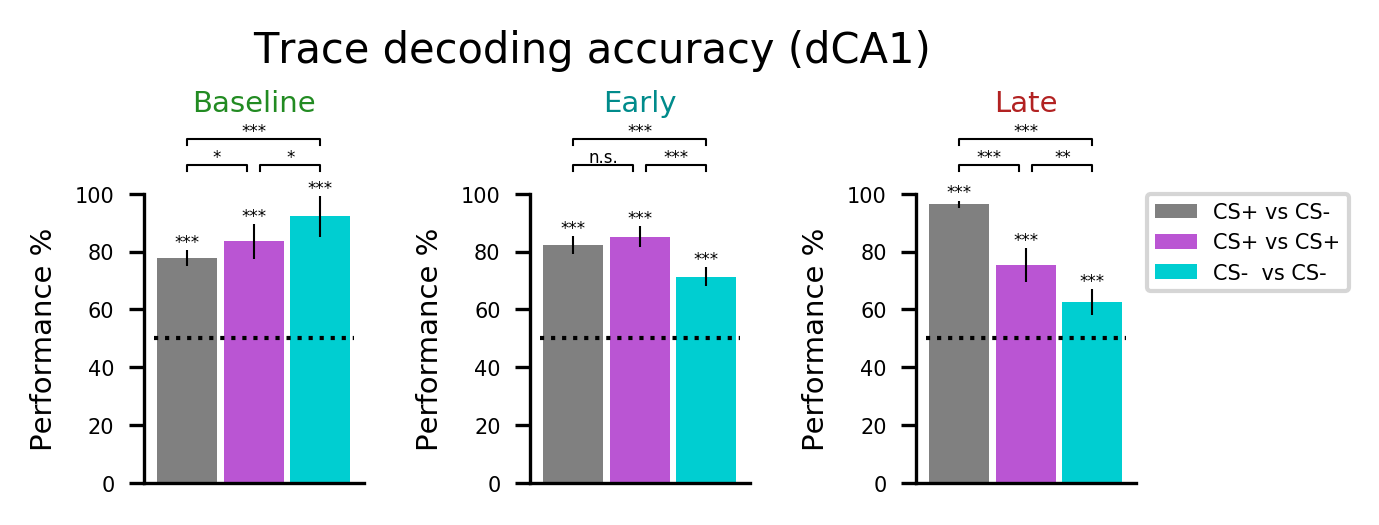

In [91]:
fig, ax = pl.subplots(1,3, figsize=(4, 1.7))
loops=10
reg='dhpc'
for comp,c,la,i in zip(alt_comparisons[:3],reg_colors[:3],comp_labels[:3],range(len(comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        ax[r].bar(i,np.mean(eval("scores_tb_8_%s_%s[sess][:loops]"%(comp,reg)))*100,width=.9, color=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_8_%s_%s[sess][:loops])*100)"%(comp,sess,reg,comp,reg))
        ax[r].errorbar(i,np.mean(eval("scores_tb_8_%s_%s[sess][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
for x in range (3):
    ax[x].set_ylim(0, 100)
    #ax[x].set_xlim(-5, 9)
    ax[x].hlines(50, -0.5,2.5, color='k', lw=1, linestyles='dotted')
    #ax[x].set_xlabel('Comparison')
    ax[x].set_ylabel('Performance %')
    ax[x].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,sess in zip(range(3),sessions):
    pvs.append(add_significance(ax[r], eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],0,.9,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],1.1,2,110,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_%s_%s[sess]"%(alt_comparisons[2],reg))[:loops],0,2,119,mcc=2))
for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
    for r,sess in zip(range(3),sessions):
        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_8_%s_%s[sess]"%(comp,reg))[:15],.5,i,
               np.mean(eval("scores_tb_8_%s_%s[sess][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

ax[0].set_title('Baseline', color=dark_co[0], y=1.2)
ax[1].set_title('Early', color = dark_co[1], y=1.2)
ax[2].set_title('Late', color = dark_co[2], y=1.2)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Trace decoding accuracy (dCA1)", fontsize=10, y=1)

fig.tight_layout(pad=1)

fig.savefig('../figures/%s_3comp_bars_ALLsess_tr_d.pdf'%NOTEBOOK_NAME)

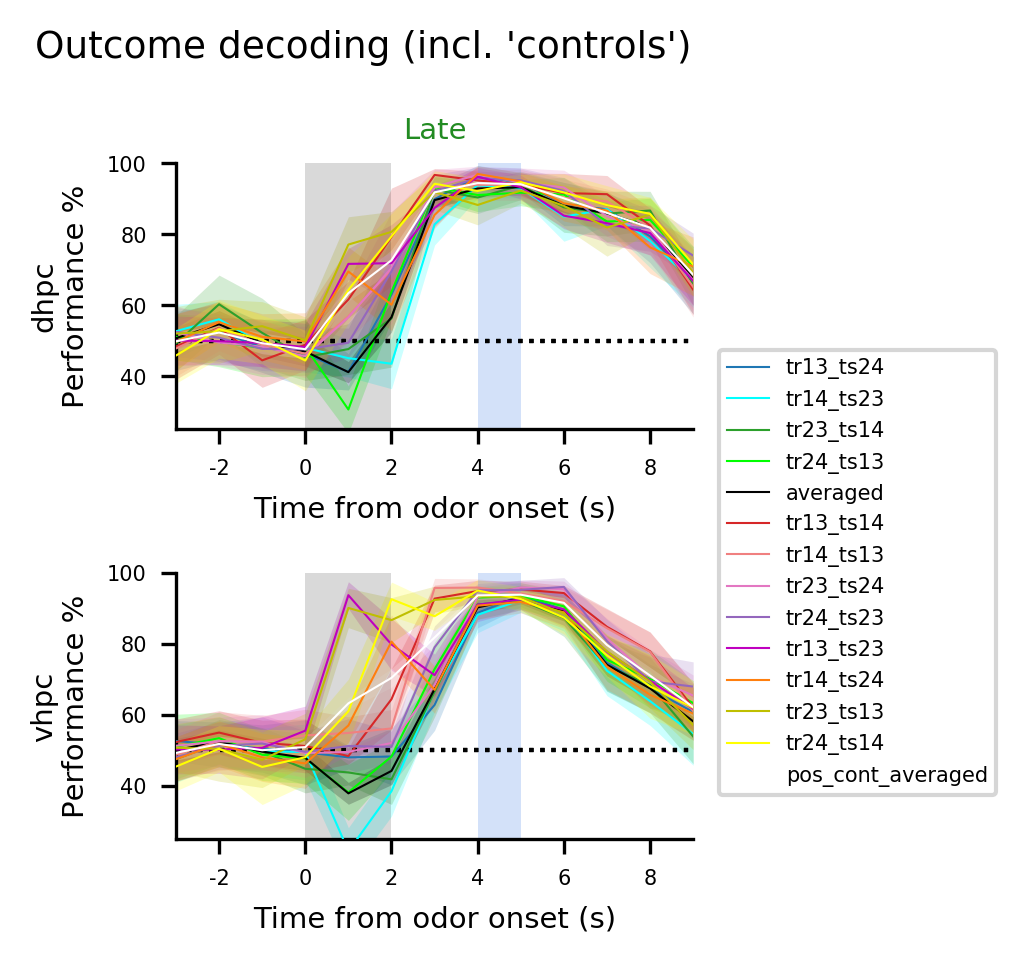

In [19]:
#outcome decoding figures...
all_outcome_pairs = 'tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13','averaged','tr13_ts14','tr14_ts13','tr23_ts24','tr24_ts23','tr13_ts23','tr14_ts24','tr23_ts13','tr24_ts14','pos_cont_averaged'
colours = ['tab:blue','cyan','tab:green','lime','k','tab:red','lightcoral','tab:pink','tab:purple','m','tab:orange','y','yellow','w']
fig, ax = pl.subplots(2,1, figsize=(2.5, 3))

for comp,c,la in zip(all_outcome_pairs,colours,all_outcome_pairs):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_outcome_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_outcome_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_outcome_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
        ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
    
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].set_ylim(25, 100)
        ax[x].set_xlim(-3, 9)
        ax[x].set_xticks(np.arange(-2,9, 2))
        ax[x].set_xticklabels(np.arange(-2,9, 2))
        ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x].set_xlabel('Time from odor onset (s)')
        ax[x].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.05)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.1)
ax[0].set_title('Late', color=dark_co[0])
ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("Outcome decoding (incl. 'controls')", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_outcome_ALLcomp_ALLtbs_late.pdf'%NOTEBOOK_NAME)

# focus on late session only (and use late minimum cells)

In [23]:
v_name=[]
for t in range(14):
    for comp in comparisons:
        for r in 'dhpc','vhpc':
            exec("scores_tb_%s_lmin_%s_%s = {}"%(t,comp,r))
            for sess in sessions:
                exec("v_name = 'scores_tb_%s_lmin_%s'"%(t,comp))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_2wayOnly/'"%(r))
                if r == 'vhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_tb_%s_lmin_%s_%s_t = ut.load_variable(v_name,path)"%(t,comp,r))
                exec("scores_tb_%s_lmin_%s_%s_t = scores_tb_%s_lmin_%s_%s_t['%s']"%(t,comp,r,t,comp,r,sess))
                exec("scores_tb_%s_lmin_%s_%s['%s'] = scores_tb_%s_lmin_%s_%s_t"%(t,comp,r,sess,t,comp,r))

In [24]:
#for an alternative take on CS+ vs CS-, average each idividual comparison
for reg in 'dhpc','vhpc':
    for t in range(14):
        exec("scores_tb_%s_lmin_CSPvsCSM_averaged_%s = {}"%(t,reg))
        for sess in sessions:
            exec("scores_tb_%s_lmin_CSPvsCSM_averaged_%s[sess] = np.mean((scores_tb_%s_lmin_CS1vsCS3_%s[sess],scores_tb_%s_lmin_CS1vsCS4_%s[sess],\
                  scores_tb_%s_lmin_CS2vsCS3_%s[sess],scores_tb_%s_lmin_CS2vsCS4_%s[sess]),axis=0)"%(t,reg,t,reg,t,reg,t,reg,t,reg))

In [25]:
#get mean of each array
for t in range(14):
    for comp in comparisons:
        for r in 'dhpc','vhpc':
            exec("mean_scores_tb_%s_lmin_%s_%s={}"%(t,comp,r))
            for sess in sessions:
                exec("mean_scores_tb_%s_lmin_%s_%s[sess]=[]"%(t,comp,r))
                for i in eval("scores_tb_%s_lmin_%s_%s[sess]"%(t,comp,r)):
                    exec("mean_scores_tb_%s_lmin_%s_%s[sess].append(i.mean())"%(t,comp,r))

In [26]:
loops=10
for t in range (14):
    for comp in comparisons:
        exec("ttest_tb_%s_lmin_%s = {}"%(t,comp))
        exec("mannwhitU_tb_%s_lmin_%s = {}"%(t,comp))
        for sess in sessions:
            exec("ttest_tb_%s_lmin_%s[sess] = sstats.ttest_ind(mean_scores_tb_%s_lmin_%s_dhpc[sess][:loops],mean_scores_tb_%s_lmin_%s_vhpc[sess][:loops])"%(t,comp,t,comp,t,comp))
            exec("mannwhitU_tb_%s_lmin_%s[sess] = sstats.mannwhitneyu(mean_scores_tb_%s_lmin_%s_dhpc[sess][:loops],mean_scores_tb_%s_lmin_%s_vhpc[sess][:loops])"%(t,comp,t,comp,t,comp))

In [27]:
v_name=[]
for t in range(14):
    for pairs in ['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13','averaged']:
        for r in 'dhpc','vhpc':
            exec("scores_tb_%s_lmin_outcome_%s_%s = {}"%(t,pairs,r))
            for sess in sessions:
                exec("v_name = 'scores_tb_%s_lmin_outcome_%s'"%(t,pairs))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s_2wayOnly/'"%(r))
                if r == 'vhpc':
                    exec("path='../notebooks/autorestore/decoding_around_onset_combined_%s/'"%(r))
                exec("scores_tb_%s_lmin_outcome_%s_%s_t = ut.load_variable(v_name,path)"%(t,pairs,r))
                exec("scores_tb_%s_lmin_outcome_%s_%s_t = scores_tb_%s_lmin_outcome_%s_%s_t['%s']"%(t,pairs,r,t,pairs,r,sess))
                exec("scores_tb_%s_lmin_outcome_%s_%s['%s'] = scores_tb_%s_lmin_outcome_%s_%s_t"%(t,pairs,r,sess,t,pairs,r))

In [28]:
#for outcome endoding, average each idividual comparison
for reg in 'dhpc','vhpc':
    for t in range(14):
        exec("scores_tb_%s_lmin_outcome_averaged_%s = {}"%(t,reg))
        for sess in sessions:
            exec("scores_tb_%s_lmin_outcome_averaged_%s[sess] = np.mean((scores_tb_%s_lmin_outcome_tr13_ts24_%s[sess],scores_tb_%s_lmin_outcome_tr14_ts23_%s[sess],\
                  scores_tb_%s_lmin_outcome_tr23_ts14_%s[sess],scores_tb_%s_lmin_outcome_tr24_ts13_%s[sess]),axis=0)"%(t,reg,t,reg,t,reg,t,reg,t,reg))

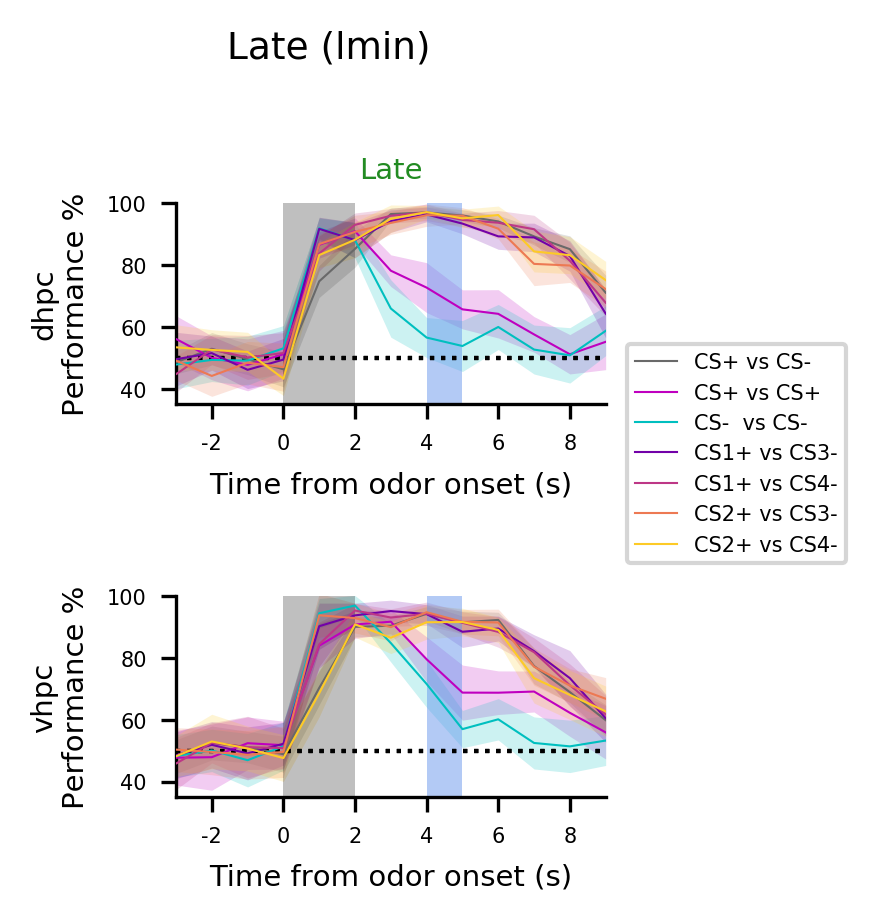

In [101]:
fig, ax = pl.subplots(2,1, figsize=(2.5, 3))

for comp,c,la in zip(comparisons,comp_colors,comp_labels):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
            s = np.array([np.std(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
            ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].set_ylim(35, 100)
        ax[x].set_xlim(-3, 9)
        ax[x].set_xticks(np.arange(-2,9, 2))
        ax[x].set_xticklabels(np.arange(-2,9, 2))
        ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x].set_xlabel('Time from odor onset (s)')
        ax[x].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Late', color=dark_co[0])
ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("Late (lmin)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_ALLcomp_ALLtbs_late.pdf'%NOTEBOOK_NAME)

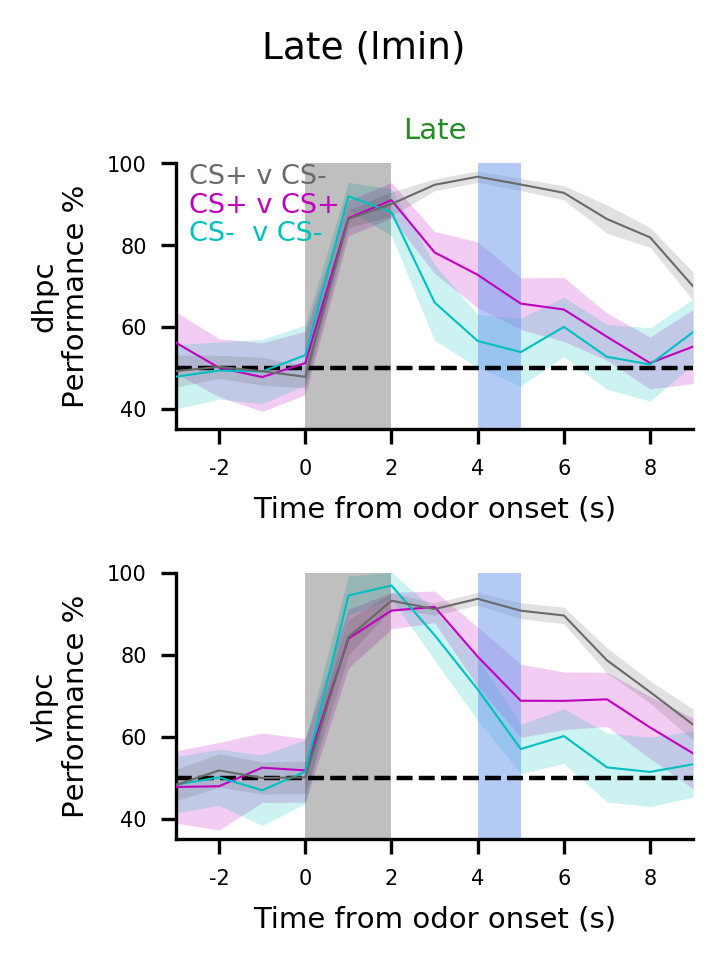

In [16]:
fig, ax = pl.subplots(2,1, figsize=(2.5, 3))

for comp,c,la in zip(['CS1vsCS2','CS3vsCS4','CSPvsCSM_averaged'],['m','c','dimgrey'],['CS+ vs CS+','CS-  vs CS-','CS+ vs CS-']):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
        ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
    
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].set_ylim(35, 100)
        ax[x].set_xlim(-3, 9)
        ax[x].set_xticks(np.arange(-2,9, 2))
        ax[x].set_xticklabels(np.arange(-2,9, 2))
        ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dashed')
        ax[x].set_xlabel('Time from odor onset (s)')
        ax[x].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].text(-2.7,95,'CS+ v CS-',color='dimgrey',fontsize=6.5)
ax[0].text(-2.7,88,'CS+ v CS+',color='m',fontsize=6.5)
ax[0].text(-2.7,81,'CS-  v CS-',color='c',fontsize=6.5)
ax[0].set_title('Late', color=dark_co[0])
#ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("Late (lmin)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_3comp_ALLtbs_late.pdf'%NOTEBOOK_NAME)

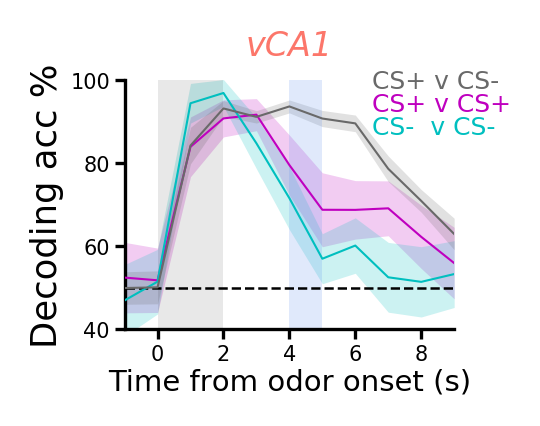

In [138]:
fig, ax = pl.subplots(1,1,figsize=(1.7, 1.5))

for comp,c,la in zip(['CS1vsCS2','CS3vsCS4','CSPvsCSM_averaged'],['m','c','dimgrey'],['CS+ vs CS+','CS-  vs CS-','CS+ vs CS-']):
    for x,reg in zip (range(1),['vhpc']):
        ax.plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
        ax.fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(40, 100)
ax.set_xlim(-1, 9)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,9, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=8.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.set_title('vCA1', color='#FC766AFF',fontstyle='italic',fontsize=8)
ax.text(6.5,96+2,'CS+ v CS-',color='dimgrey',fontsize=6)
ax.text(6.5,90.5+2,'CS+ v CS+',color='m',fontsize=6)
ax.text(6.5,85+2,'CS-  v CS-',color='c',fontsize=6)
#ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
#pl.suptitle("Late", fontsize=9, y=1,color='firebrick')

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_3comp_ALLtbs_late_v.pdf'%NOTEBOOK_NAME)

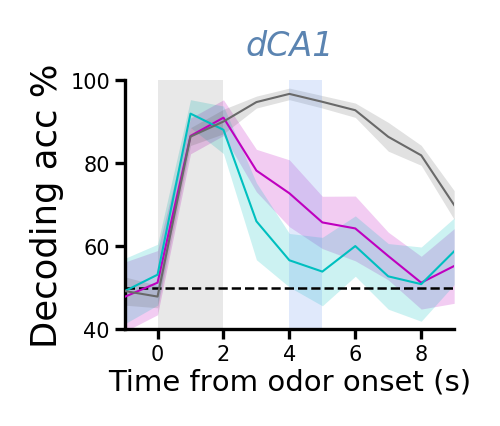

In [139]:
fig, ax = pl.subplots(1,1,figsize=(1.7, 1.5))

for comp,c,la in zip(['CS1vsCS2','CS3vsCS4','CSPvsCSM_averaged'],['m','c','dimgrey'],['CS+ vs CS+','CS-  vs CS-','CS+ vs CS-']):
    for x,reg in zip (range(1),['dhpc']):
        ax.plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_lmin_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
        ax.fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(40, 100)
ax.set_xlim(-1, 9)
ax.tick_params(axis='both',pad=1,length=2.5)
ax.set_xticks(np.arange(0,9, 2))
ax.set_xticklabels(np.arange(0,11, 2))
ax.hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
ax.set_xlabel('Time from odor onset (s)',labelpad=1)
ax.set_ylabel('Decoding acc %',fontsize=8.5,labelpad=1.5)
pt.plot_period_bar(ax, 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
pt.plot_period_bar(ax, 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax.set_title('dCA1', color='#5B84B1FF',fontstyle='italic',fontsize=8)
#ax.text(6.5,96+2,'CS+ v CS-',color='dimgrey',fontsize=6)
#ax.text(6.5,90.5+2,'CS+ v CS+',color='m',fontsize=6)
#ax.text(6.5,85+2,'CS-  v CS-',color='c',fontsize=6)
#ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
#pl.suptitle("Late", fontsize=9, y=1,color='firebrick')

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_3comp_ALLtbs_late_d.pdf'%NOTEBOOK_NAME)

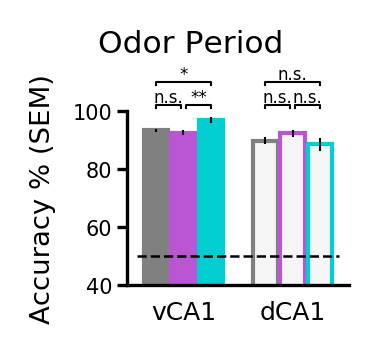

In [153]:
fig, ax = pl.subplots(figsize=(1.35,1.02))
loops=10
for comp,c,la,i in zip(alt_comparisons[:3],['grey','mediumorchid','darkturquoise'],comp_labels[:3],range(len(comparisons[:3]))):
    for r,reg in zip([0,4],['vhpc','dhpc']):
        if reg == 'vhpc':
            color=c
        if reg == 'dhpc':
            color='whitesmoke'
        ax.bar(i+r,np.mean(eval("scores_tb_6_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100,width=.9, color=color,edgecolor=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_6_lmin_%s_%s['post'][:loops])*100/np.sqrt(loops-1))"%(comp,sess,reg,comp,reg))
        ax.errorbar(i+r,np.mean(eval("scores_tb_6_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([1,5])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=6)
ax.hlines(50, -0.7,6.7, color='k', lw=.6, linestyles='dashed')
#ax.set_xlabel('Comparison')
ax.set_ylabel('Accuracy % (SEM)',fontsize=6.6)
#ax.tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,reg in zip([0,4],['vhpc','dhpc']):
    pvs.append(add_significance(ax, eval("scores_tb_6_lmin_%s_%s['post']"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_6_lmin_%s_%s['post']"%(alt_comparisons[1],reg))[:loops],0+r,.9+r,102,mcc=2))
    pvs.append(add_significance(ax, eval("scores_tb_6_lmin_%s_%s['post']"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_6_lmin_%s_%s['post']"%(alt_comparisons[2],reg))[:loops],1.1+r,2+r,102,mcc=2))
    pvs.append(add_significance(ax, eval("scores_tb_6_lmin_%s_%s['post']"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_6_lmin_%s_%s['post']"%(alt_comparisons[2],reg))[:loops],0+r,2+r,110,mcc=2))
#for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
#    for r,reg in zip(range(2),['dhpc','vhpc']):
#        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_6_lmin_%s_%s['post']"%(comp,reg))[:15],.5,i,
#               np.mean(eval("scores_tb_6_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

#ax.text(4,100,'dCA1',color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.text(0,100,'vCA1',color='darkorange',fontstyle='italic',fontsize=8)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Odor Period", fontsize=7.5, y=1.1)

fig.tight_layout(pad=2)

fig.savefig('../figures/%s_3comp_bars_CS_late.pdf'%NOTEBOOK_NAME)

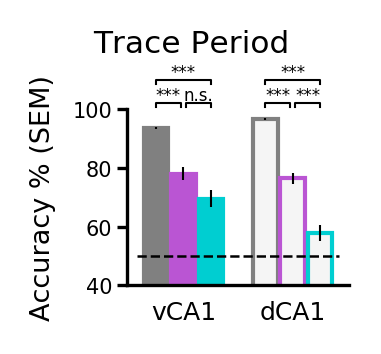

In [154]:
fig, ax = pl.subplots(figsize=(1.35,1.02))
loops=10
for comp,c,la,i in zip(alt_comparisons[:3],['grey','mediumorchid','darkturquoise'],comp_labels[:3],range(len(comparisons[:3]))):
    for r,reg in zip([0,4],['vhpc','dhpc']):
        if reg == 'vhpc':
            color=c
        if reg == 'dhpc':
            color='whitesmoke'
        ax.bar(i+r,np.mean(eval("scores_tb_8_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100,width=.9, color=color,edgecolor=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_8_lmin_%s_%s['post'][:loops])*100/np.sqrt(loops-1))"%(comp,sess,reg,comp,reg))
        ax.errorbar(i+r,np.mean(eval("scores_tb_8_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
ax.tick_params(axis='both',bottom=False,pad=1,length=2.5)
ax.set_ylim(40,100)
ax.set_xticks([1,5])
ax.set_xticklabels(['vCA1','dCA1'],fontsize=6)
ax.hlines(50, -0.7,6.7, color='k', lw=.6, linestyles='dashed')
#ax.set_xlabel('Comparison')
ax.set_ylabel('Accuracy % (SEM)',fontsize=6.5)
#ax.tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,reg in zip([0,4],['vhpc','dhpc']):
    pvs.append(add_significance(ax, eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[1],reg))[:loops],0+r,.9+r,102,mcc=2))
    pvs.append(add_significance(ax, eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[2],reg))[:loops],1.1+r,2+r,102,mcc=2))
    pvs.append(add_significance(ax, eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[2],reg))[:loops],0+r,2+r,110,mcc=2))
#for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
#    for r,reg in zip(range(2),['dhpc','vhpc']):
#        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_8_lmin_%s_%s['post']"%(comp,reg))[:15],.5,i,
#               np.mean(eval("scores_tb_8_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

#ax.text(4,100,'dCA1',color='mediumseagreen',fontstyle='italic',fontsize=8)
#ax.text(0,100,'vCA1',color='darkorange',fontstyle='italic',fontsize=8)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Trace Period", fontsize=7.5, y=1.1)

fig.tight_layout(pad=2)

fig.savefig('../figures/%s_3comp_bars_tr_late.pdf'%NOTEBOOK_NAME)

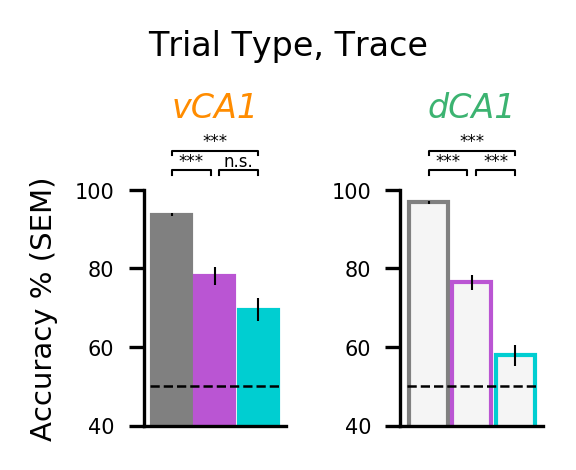

In [102]:
fig, ax = pl.subplots(1,2, figsize=(2, 1.5))
loops=10
for comp,c,la,i in zip(alt_comparisons[:3],['grey','mediumorchid','darkturquoise'],comp_labels[:3],range(len(comparisons[:3]))):
    for r,reg in zip(range(2),['vhpc','dhpc']):
        if reg == 'vhpc':
            color=c
        if reg == 'dhpc':
            color='whitesmoke'
        ax[r].bar(i,np.mean(eval("scores_tb_8_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100,width=.9, color=color,edgecolor=c,label=la)
        exec("s_%s_%s_%s = np.array(np.std(scores_tb_8_lmin_%s_%s['post'][:loops])*100/np.sqrt(loops-1))"%(comp,sess,reg,comp,reg))
        ax[r].errorbar(i,np.mean(eval("scores_tb_8_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100,yerr=eval('s_%s_%s_%s'%(comp,sess,reg)),color='k')
for x in range (2):
    ax[x].set_ylim(40, 100)
    #ax[x].set_xlim(-5, 9)
    ax[x].hlines(50, -0.5,2.5, color='k', lw=.6, linestyles='dashed')
    #ax[x].set_xlabel('Comparison')
    ax[0].set_ylabel('Accuracy % (SEM)')
    ax[x].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for r,reg in zip(range(2),['vhpc','dhpc']):
    pvs.append(add_significance(ax[r], eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[1],reg))[:loops],0,.9,105,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[1],reg))[:loops],
                eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[2],reg))[:loops],1.1,2,105,mcc=2))
    pvs.append(add_significance(ax[r], eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[0],reg))[:loops],
                eval("scores_tb_8_lmin_%s_%s['post']"%(alt_comparisons[2],reg))[:loops],0,2,110,mcc=2))
#for comp,i in zip(alt_comparisons[:3], range(len(alt_comparisons[:3]))):
#    for r,reg in zip(range(2),['dhpc','vhpc']):
#        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_8_lmin_%s_%s['post']"%(comp,reg))[:15],.5,i,
#               np.mean(eval("scores_tb_8_lmin_%s_%s['post'][:loops]"%(comp,reg)))*100+(eval("s_%s_%s_%s"%(comp,sess,reg)))+1,loops=loops,sig_func=None,colors='k'))

ax[1].set_title('dCA1', y=1.2,color='mediumseagreen',fontstyle='italic',fontsize=8)
ax[0].set_title('vCA1', y=1.2,color='darkorange',fontstyle='italic',fontsize=8)
#ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Trial Type, Trace", fontsize=8, y=1)

fig.tight_layout(pad=2)

fig.savefig('../figures/%s_3comp_bars_tr_late.pdf'%NOTEBOOK_NAME)

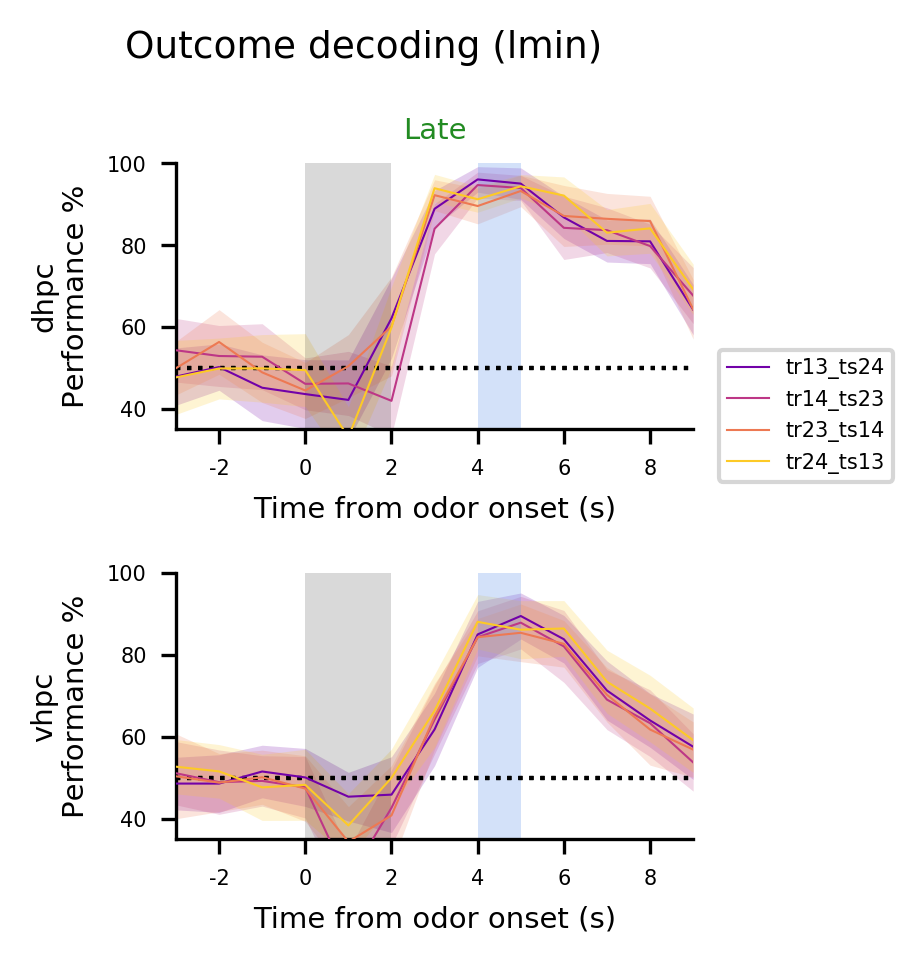

In [34]:
#outcome decoding figures...
fig, ax = pl.subplots(2,1, figsize=(2.5, 3))

for comp,c,la in zip(['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13'],tt_colors,['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13']):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_lmin_outcome_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("scores_tb_%s_lmin_outcome_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
        s = np.array([np.std(eval("scores_tb_%s_lmin_outcome_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
        ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
    
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].set_ylim(35, 100)
        ax[x].set_xlim(-3, 9)
        ax[x].set_xticks(np.arange(-2,9, 2))
        ax[x].set_xticklabels(np.arange(-2,9, 2))
        ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x].set_xlabel('Time from odor onset (s)')
        ax[x].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.05)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.1)
ax[0].set_title('Late', color=dark_co[0])
ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("Outcome decoding (lmin)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_outcome_ALLcomp_ALLtbs_late.pdf'%NOTEBOOK_NAME)

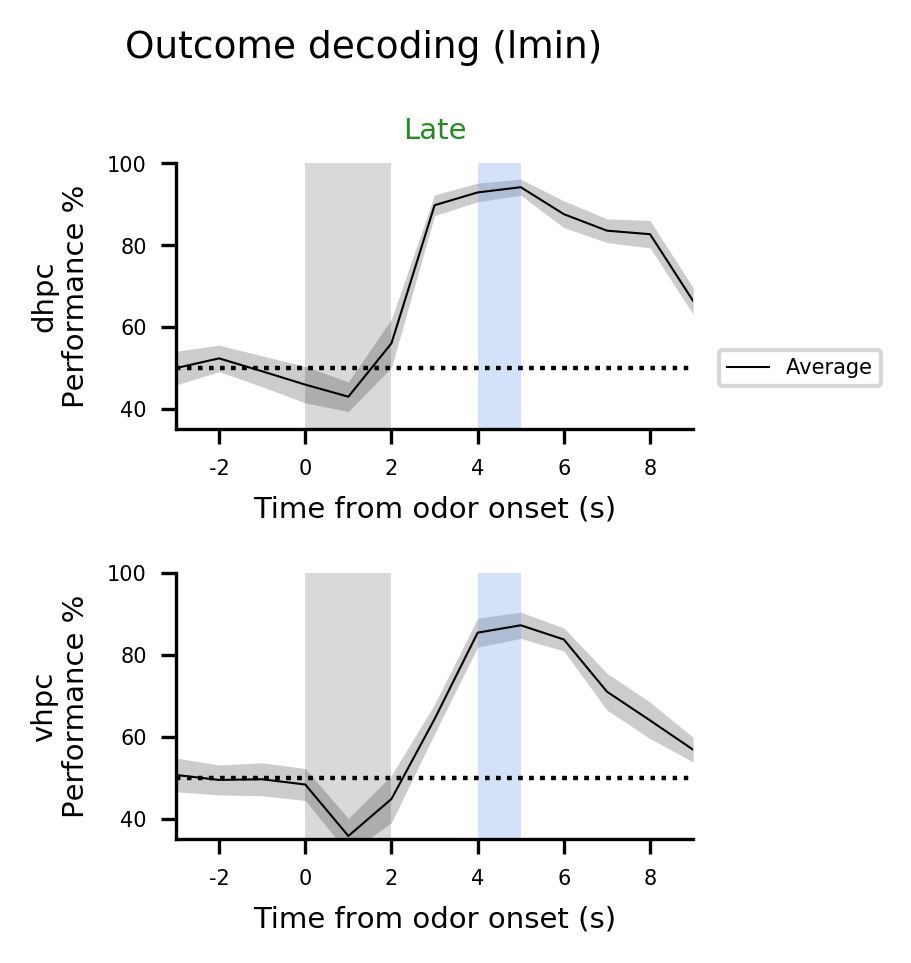

In [35]:
#outcome decoding figures...
fig, ax = pl.subplots(2,1, figsize=(2.5, 3))

for x,reg in zip (range(2),['dhpc','vhpc']):
    ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s['post']"%(t,reg)))*100) for t in range(14)],
                   color='k', ls='-',lw=.5, zorder=19 ,ms=1,label='Average')
    m = np.array([(np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s['post']"%(t,reg)))*100) for t in range(14)])
    s = np.array([np.std(eval("scores_tb_%s_lmin_outcome_averaged_%s['post']"%(t,reg)))*100 for t in range(14)])
    ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color='k',linewidth=0)
    
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x].set_ylim(35, 100)
        ax[x].set_xlim(-3, 9)
        ax[x].set_xticks(np.arange(-2,9, 2))
        ax[x].set_xticklabels(np.arange(-2,9, 2))
        ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x].set_xlabel('Time from odor onset (s)')
        ax[x].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.05)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.1)
ax[0].set_title('Late', color=dark_co[0])
ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("Outcome decoding (lmin)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_outcome_avg_ALLtbs_late.pdf'%NOTEBOOK_NAME)

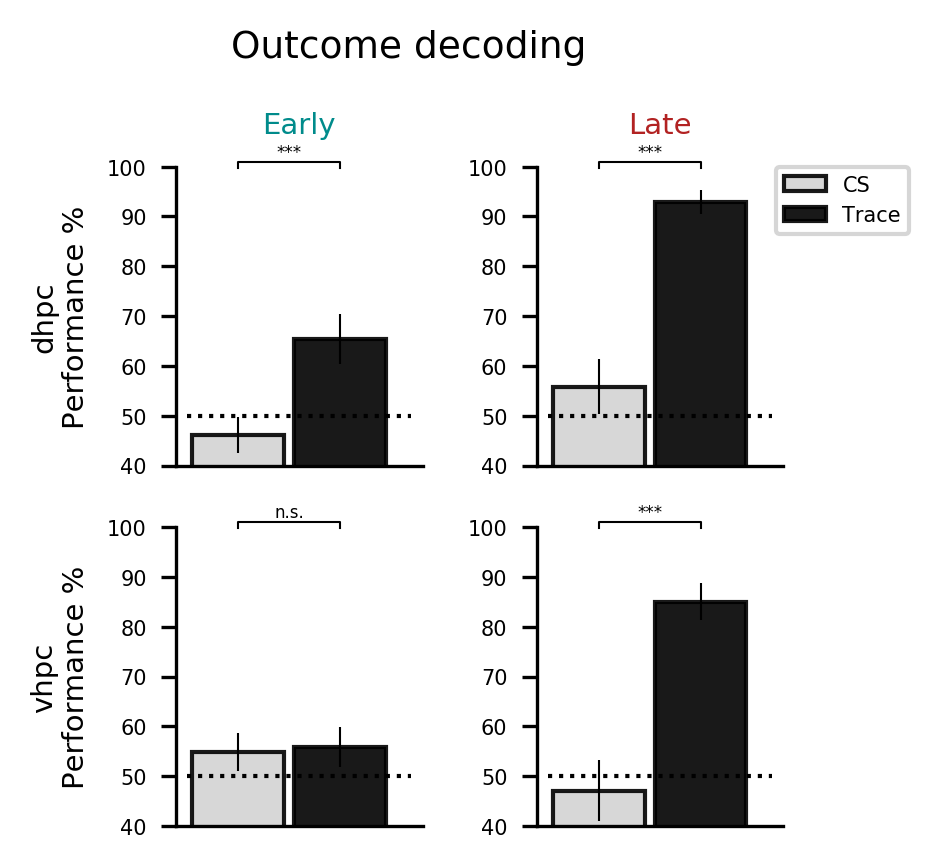

In [64]:
fig, ax = pl.subplots(2,2, figsize=(2.8, 2.7))
loops=10
for reg,r in zip(['dhpc','vhpc'],range(2)):
    for i,k,c,la in zip(range(2),[6,8],['lightgrey','k'],['CS','Trace']):
        for y,sess in zip(range(2),sessions[1:]):
            ax[r][y].bar(i,np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s[sess][:loops]"%(k,reg)))*100,width=.9,
                      color=c,alpha=.9,label=la,edgecolor='k')
            exec("s_%s_%s_%s = np.array(np.std(scores_tb_%s_lmin_outcome_averaged_%s[sess][:loops])*100)"%(k,reg,sess,k,reg))
            ax[r][y].errorbar(i,np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s[sess][:loops]"%(k,reg)))*100,yerr=eval('s_%s_%s_%s'%(k,reg,sess)),color='k')
for reg,x in zip(['dhpc','vhpc'],range(2)):
    for y in range(2):
        ax[x][y].set_ylim(40, 100)
        #ax[x].set_xlim(-5, 9)
        ax[x][y].hlines(50, -0.5,1.7, color='k', lw=1, linestyles='dotted')
        #ax[x].set_xlabel('Comparison')
        ax[x][0].set_ylabel(reg+'\nPerformance %')
        ax[x][y].tick_params(axis='x',bottom='off',labelbottom='off')

pvs=[]
for reg,r in zip(['dhpc','vhpc'],range(2)):
    for y,sess,q in zip(range(2),sessions[1:],[101,101]):
        pvs.append(add_significance(ax[r][y], eval("scores_tb_6_lmin_outcome_averaged_%s[sess][:loops]"%(reg)),
                    eval("scores_tb_8_lmin_outcome_averaged_%s[sess][:loops]"%(reg)),0,1,q))
#for i,k,c,la in zip(range(2),[6,8],['lightgrey','k'],['CS','Trace']):
#    for r,sess in zip(range(2),sessions[1:]):
#        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_%s_lmin_outcome_averaged[sess][:loops]"%(k))[:loops],.5,i,
#               np.mean(eval("scores_tb_%s_lmin_outcome_averaged[sess][:loops]"%(k)))*100+(eval("s_%s_%s"%(k,sess)))+1,loops=loops,sig_func=None,colors='k'))

#ax[0].set_title('Baseline', color=dark_co[0], y=1.)
ax[0][0].set_title('Early', color = dark_co[1], y=1.03)
ax[0][1].set_title('Late', color = dark_co[2], y=1.03)
ax[0][1].legend(bbox_to_anchor=(.97, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Outcome decoding", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

fig.savefig('../figures/%s_CSvsTr_outcome_decoding_earlylate.pdf'%NOTEBOOK_NAME)

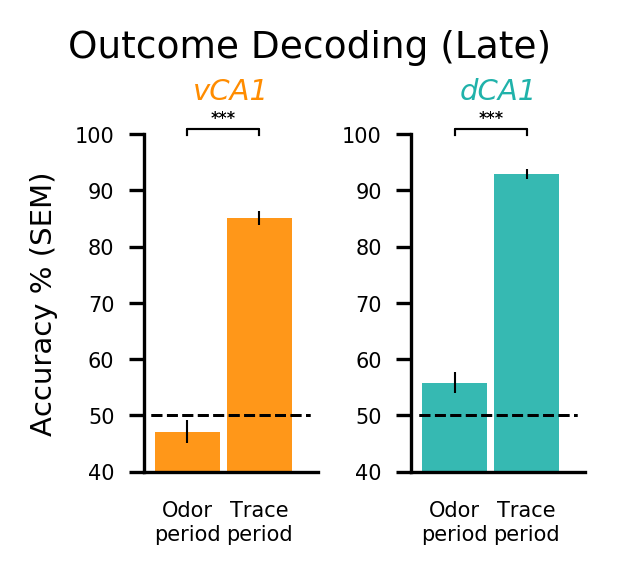

In [82]:
fig, ax = pl.subplots(1,2, figsize=(2, 1.7))
loops=10
for reg,r,co in zip(['vhpc','dhpc'],range(2),['darkorange','lightseagreen']):
    for i,k,c,la in zip(range(2),[6,8],['k','k'],['CS','Trace']):
            ax[r].bar(i,np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops]"%(k,reg)))*100,width=.9,
                      color=co,alpha=.9,label=la)
            exec("s_%s_%s_%s = np.array(np.std(scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops])*100/np.sqrt(loops-1))"%(k,reg,sess,k,reg))
            ax[r].errorbar(i,np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops]"%(k,reg)))*100,yerr=eval('s_%s_%s_%s'%(k,reg,sess)),color='k')
for x in range (2):
    for y in range(2):
        ax[x].set_ylim(40, 100)
        #ax[x].set_xlim(-5, 9)
        ax[x].hlines(50, -0.5,1.7, color='k', lw=.7, linestyles='dashed')
        #ax[x].set_xlabel('Comparison')
        ax[0].set_ylabel('Accuracy % (SEM)')
        ax[x].set_xticks([0,1])
        ax[x].set_xticklabels(['Odor\nperiod','Trace\nperiod'])
        ax[x].tick_params(axis='x',bottom='off')

pvs=[]
for reg,r in zip(['vhpc','dhpc'],range(2)):
    for q in [101,101]:
        pvs.append(add_significance(ax[r], eval("scores_tb_6_lmin_outcome_averaged_%s['post'][:loops]"%(reg)),
                    eval("scores_tb_8_lmin_outcome_averaged_%s['post'][:loops]"%(reg)),0,1,q))
#for i,k,c,la in zip(range(2),[6,8],['lightgrey','k'],['CS','Trace']):
#    for r,sess in zip(range(2),sessions[1:]):
#        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_%s_lmin_outcome_averaged[sess][:loops]"%(k))[:loops],.5,i,
#               np.mean(eval("scores_tb_%s_lmin_outcome_averaged[sess][:loops]"%(k)))*100+(eval("s_%s_%s"%(k,sess)))+1,loops=loops,sig_func=None,colors='k'))

#ax[0].set_title('Baseline', color=dark_co[0], y=1.)
ax[0].set_title('vCA1', y=1.03,color='darkorange',fontstyle='italic')
ax[1].set_title('dCA1', y=1.03,color='lightseagreen',fontstyle='italic')
#ax[1].legend(bbox_to_anchor=(.97, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Outcome Decoding (Late)", fontsize=9, y=1.05)

fig.tight_layout(pad=1)

fig.savefig('../figures/%s_CSvsTr_outcome_decoding_late.pdf'%NOTEBOOK_NAME)

In [14]:
(scores_tb_8_lmin_outcome_averaged_dhpc['post'][:loops])

array([ 0.95375,  0.87875,  0.93875,  0.8925 ,  0.9175 ,  0.9525 ,
        0.9225 ,  0.95   ,  0.95   ,  0.93375])

U = 0.0 p = 0.00018267179111 r = -0.845154254729
U = 0.0 p = 0.000180634720808 r = -0.845154254729


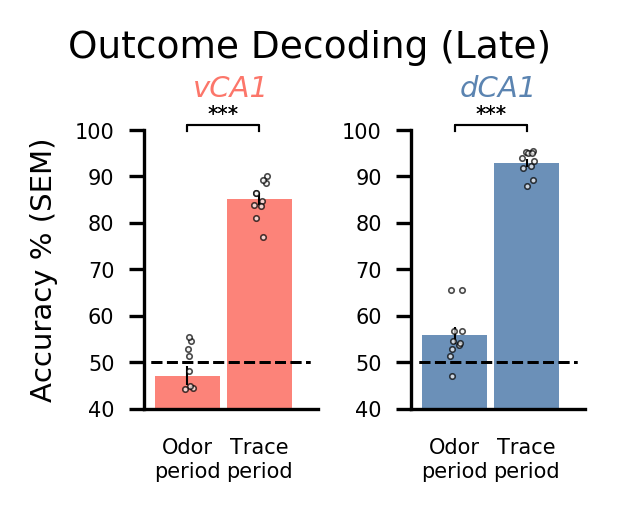

In [15]:
fig, ax = pl.subplots(1,2, figsize=(2, 1.5))
loops=10
for reg,r,co in zip(['vhpc','dhpc'],range(2),['#FC766AFF','#5B84B1FF']):
    for i,k,c,la in zip(range(2),[6,8],['k','k'],['CS','Trace']):
            ax[r].bar(i,np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops]"%(k,reg)))*100,width=.9,
                      color=co,alpha=.9,label=la)
            exec("s_%s_%s_%s = np.array(np.std(scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops])*100/np.sqrt(loops-1))"%(k,reg,sess,k,reg))
            ax[r].errorbar(i,np.mean(eval("scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops]"%(k,reg)))*100,yerr=eval('s_%s_%s_%s'%(k,reg,sess)),color='k')
            ax[r].scatter(i+np.random.random(loops)*width/2-width/4.5,np.array(eval("scores_tb_%s_lmin_outcome_averaged_%s['post'][:loops]"%(k,reg)))*100,
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
            
for x in range (2):
    for y in range(2):
        ax[x].set_ylim(40, 100)
        #ax[x].set_xlim(-5, 9)
        ax[x].hlines(50, -0.5,1.7, color='k', lw=.7, linestyles='dashed')
        #ax[x].set_xlabel('Comparison')
        ax[0].set_ylabel('Accuracy % (SEM)')
        ax[x].set_xticks([0,1])
        ax[x].set_xticklabels(['Odor\nperiod','Trace\nperiod'])
        ax[x].tick_params(axis='x',bottom='off')

pvs=[]
for reg,r in zip(['vhpc','dhpc'],range(2)):
    for q in [101,101]:
        pvs.append(add_significance(ax[r], eval("scores_tb_6_lmin_outcome_averaged_%s['post'][:loops]"%(reg)),
                    eval("scores_tb_8_lmin_outcome_averaged_%s['post'][:loops]"%(reg)),0,1,q))
    report_stats(eval("scores_tb_6_lmin_outcome_averaged_%s['post'][:loops]"%(reg)),
                    eval("scores_tb_8_lmin_outcome_averaged_%s['post'][:loops]"%(reg)))
#for i,k,c,la in zip(range(2),[6,8],['lightgrey','k'],['CS','Trace']):
#    for r,sess in zip(range(2),sessions[1:]):
#        pvs.append(sig_vs_chance(ax[r],eval("scores_tb_%s_lmin_outcome_averaged[sess][:loops]"%(k))[:loops],.5,i,
#               np.mean(eval("scores_tb_%s_lmin_outcome_averaged[sess][:loops]"%(k)))*100+(eval("s_%s_%s"%(k,sess)))+1,loops=loops,sig_func=None,colors='k'))

#ax[0].set_title('Baseline', color=dark_co[0], y=1.)
ax[0].set_title('vCA1', y=1.03,color='#FC766AFF',fontstyle='italic')
ax[1].set_title('dCA1', y=1.03,color='#5B84B1FF',fontstyle='italic')
#ax[1].legend(bbox_to_anchor=(.97, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Outcome Decoding (Late)", fontsize=9, y=1.05)

fig.tight_layout(pad=1)

fig.savefig('../figures/%s_CSvsTr_outcome_decoding_late.pdf'%NOTEBOOK_NAME)

In [39]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
